In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [4]:
df=pd.read_csv('wine.csv')
df.head()

,Class,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Part A 

In [5]:
def distance(instance1, instance2):
    """ Calculates the Eucledian distance between two instances""" 
    return np.linalg.norm(np.subtract(instance1, instance2))

In [6]:
def get_neighbors(training_set, labels, test_instance, k, distance):
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [8]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [10]:
print("The sample is :{}\n".format(X_test.values[1]))
get_neighbors(X_train.values, y_train.values, X_test.values[1], 3, distance=distance)

The sample is :[1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.480e+00 1.360e+00
 2.400e-01 1.260e+00 1.080e+01 4.800e-01 1.470e+00 4.800e+02]



[(array([1.184e+01, 2.890e+00, 2.230e+00, 1.800e+01, 1.120e+02, 1.720e+00,
         1.320e+00, 4.300e-01, 9.500e-01, 2.650e+00, 9.600e-01, 2.520e+00,
         5.000e+02]), 22.02181191455417, 2),
 (array([1.27e+01, 3.87e+00, 2.40e+00, 2.30e+01, 1.01e+02, 2.83e+00,
         2.55e+00, 4.30e-01, 1.95e+00, 2.57e+00, 1.19e+00, 3.13e+00,
         4.63e+02]), 22.072559887788277, 2),
 (array([1.35e+01, 3.12e+00, 2.62e+00, 2.40e+01, 1.23e+02, 1.40e+00,
         1.57e+00, 2.20e-01, 1.25e+00, 8.60e+00, 5.90e-01, 1.30e+00,
         5.00e+02]), 23.036019621453704, 3)]

In [11]:
from collections import Counter

def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [12]:
for i in range(5):
    neighbors = get_neighbors(X_train.values, 
                              y_train.values, 
                              X_test.values[i], 
                              3, 
                              distance=distance)
    print("Index:         ",i,'\n',
          "Resulted votes:  ",vote(neighbors),'\n', 
          "Label: ",y_test.values[i],'\n', 
          "data:      ",X_test.values[i],'\n')

Index:          0 
 Resulted votes:   1 
 Label:  1 
 data:       [1.374e+01 1.670e+00 2.250e+00 1.640e+01 1.180e+02 2.600e+00 2.900e+00
 2.100e-01 1.620e+00 5.850e+00 9.200e-01 3.200e+00 1.060e+03] 

Index:          1 
 Resulted votes:   2 
 Label:  3 
 data:       [1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.480e+00 1.360e+00
 2.400e-01 1.260e+00 1.080e+01 4.800e-01 1.470e+00 4.800e+02] 

Index:          2 
 Resulted votes:   2 
 Label:  2 
 data:       [1.237e+01 1.130e+00 2.160e+00 1.900e+01 8.700e+01 3.500e+00 3.100e+00
 1.900e-01 1.870e+00 4.450e+00 1.220e+00 2.870e+00 4.200e+02] 

Index:          3 
 Resulted votes:   1 
 Label:  1 
 data:       [1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
 2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03] 

Index:          4 
 Resulted votes:   2 
 Label:  2 
 data:       [1.305e+01 5.800e+00 2.130e+00 2.150e+01 8.600e+01 2.620e+00 2.650e+00
 3.000e-01 2.010e+00 2.600e+00 7.300e-01 3.100e+00 3.800e+0

In [13]:
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

In [14]:
 for i in range(5):
    neighbors = get_neighbors(X_train.values, 
                              y_train.values, 
                              X_test.values[i], 
                              5, 
                              distance=distance)   
    print("index: ", i, 
          ", vote_prob: ", vote_prob(neighbors), 
          ", label: ", y_test.values[i], 
          ", data: ", X_test.values[i])

index:  0 , vote_prob:  (1, 1.0) , label:  1 , data:  [1.374e+01 1.670e+00 2.250e+00 1.640e+01 1.180e+02 2.600e+00 2.900e+00
 2.100e-01 1.620e+00 5.850e+00 9.200e-01 3.200e+00 1.060e+03]
index:  1 , vote_prob:  (2, 0.6) , label:  3 , data:  [1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.480e+00 1.360e+00
 2.400e-01 1.260e+00 1.080e+01 4.800e-01 1.470e+00 4.800e+02]
index:  2 , vote_prob:  (2, 1.0) , label:  2 , data:  [1.237e+01 1.130e+00 2.160e+00 1.900e+01 8.700e+01 3.500e+00 3.100e+00
 1.900e-01 1.870e+00 4.450e+00 1.220e+00 2.870e+00 4.200e+02]
index:  3 , vote_prob:  (1, 1.0) , label:  1 , data:  [1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
 2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03]
index:  4 , vote_prob:  (2, 1.0) , label:  2 , data:  [1.305e+01 5.800e+00 2.130e+00 2.150e+01 8.600e+01 2.620e+00 2.650e+00
 3.000e-01 2.010e+00 2.600e+00 7.300e-01 3.100e+00 3.800e+02]


In [15]:
pred=[]
prob=[]
for row in X_test.values:
     neighbors = get_neighbors(X_train.values, y_train.values, row, 5, distance=distance)   
     pred.append(vote_prob(neighbors)[0])
     prob.append(vote_prob(neighbors)[1])
acc=np.sum(np.array(pred)==y_test.values)/len(X_test)*100
print(acc)

83.33333333333334


In [16]:
df_new=pd.DataFrame(np.vstack((y_test.values,np.array(pred),np.array(prob))).T,columns=['Label','Predict','Probability'])
df_new

,Label,Predict,Probability
0,1.0,1.0,1.0
1,3.0,2.0,0.6
2,2.0,2.0,1.0
3,1.0,1.0,1.0
4,2.0,2.0,1.0
5,2.0,2.0,0.8
6,1.0,1.0,1.0
7,3.0,3.0,0.6
8,2.0,2.0,0.8
9,2.0,2.0,0.6


In [17]:
df_new['Cond']=df_new['Predict']==df_new['Label']
df_new['Cond']

0      True
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23     True
24     True
25     True
26     True
27     True
28    False
29     True
30     True
31     True
32     True
33     True
34     True
35     True
Name: Cond, dtype: bool

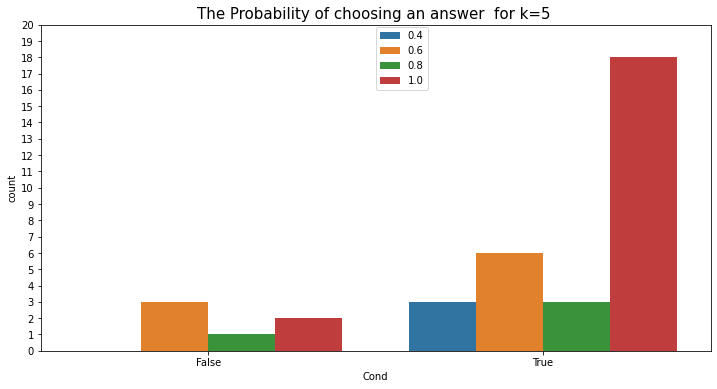

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_new,x='Cond',hue='Probability')
plt.legend(loc=(0.5,0.8))
plt.yticks(np.linspace(0,20,21));
plt.title("The Probability of choosing an answer  for k=5 ",size=15);

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.88      0.88      0.88        16
           3       0.50      0.50      0.50         6

    accuracy                           0.83        36
   macro avg       0.77      0.77      0.77        36
weighted avg       0.83      0.83      0.83        36



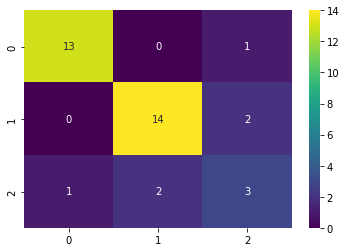

In [19]:
print(sns.heatmap(confusion_matrix(y_test.values.astype('int'),np.array(pred).astype('int')),annot=True,cmap='viridis'))
print(classification_report(y_test.values.astype('int'),np.array(pred).astype('int')))

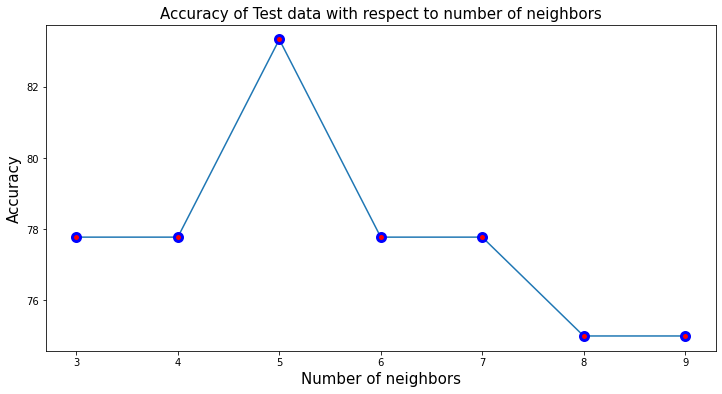

In [20]:
plt.figure(figsize=(12,6))
acc=[]
for k in range(3,10,1):
  pred=[]
  prob=[]
  for row in X_test.values:
     neighbors = get_neighbors(X_train.values, y_train.values, row, k, distance=distance)   
     pred.append(vote_prob(neighbors)[0])
     prob.append(vote_prob(neighbors)[1])
  acc.append(np.sum(np.array(pred)==y_test.values)/len(X_test)*100)
plt.plot(np.arange(3,10,1),acc,marker='o',markeredgecolor="b",markerfacecolor="r",ms=8,markeredgewidth=3)
plt.title("Accuracy of Test data with respect to number of neighbors",size=15)
plt.xlabel('Number of neighbors',size=15)
plt.ylabel('Accuracy',size=15);

# Part B

In [21]:
!pip install metric-learn
from metric_learn import LMNN

     |████████████████████████████████| 64 kB 2.5 MB/s 


In [22]:
lmnn = LMNN(k=5, learn_rate=1e-6)

In [23]:
X_tr_new=lmnn.fit_transform(X_train,y_train)
X_test_new=lmnn.transform(X_test)
#X_test_metric,X_test_metric=lmnn.transform(X_test,y_test)

In [24]:
lmnn.get_mahalanobis_matrix()

array([[ 9.15429017e-01,  2.98557731e-02,  2.44170202e-02,
        -5.64284844e-03, -6.93969014e-03, -8.11424563e-03,
         2.84518059e-02, -4.17797988e-03,  4.89627283e-03,
        -9.38701807e-02, -8.98959409e-03,  2.31163171e-02,
        -2.23815532e-04],
       [ 2.98557731e-02,  6.84794049e-01,  1.89899471e-02,
        -5.34833130e-02, -8.01121303e-04, -6.68854689e-03,
        -2.72261152e-02, -4.27328528e-03, -4.37767148e-02,
         6.74757761e-02, -8.53041519e-03, -2.21269758e-02,
        -5.76991496e-04],
       [ 2.44170202e-02,  1.89899471e-02,  1.00687937e+00,
        -7.42079704e-02, -6.77838431e-04, -4.28787537e-03,
         1.69737737e-05, -3.03256178e-03, -1.80842722e-02,
         1.73817383e-02, -7.62889084e-03, -1.30216827e-03,
         7.95619789e-03],
       [-5.64284844e-03, -5.34833130e-02, -7.42079704e-02,
         2.79499525e-02,  1.51819602e-03, -1.21192534e-02,
        -4.75652628e-02, -6.30331656e-03, -3.77911515e-02,
        -1.54673890e-02, -1.33723298e

In [25]:
(X_train.iloc[0]-X_train.iloc[1]).T @ lmnn.get_mahalanobis_matrix() @ (X_train.iloc[0]-X_train.iloc[1])

21.955137907636434

In [26]:
(X_tr_new[0]-X_tr_new[1]).T @ (X_tr_new[0]-X_tr_new[1])

21.95513790763644

In [27]:
dis=[]
for i in range(1,len(X_train)):
  dis.append((X_train.iloc[0]-X_train.iloc[i]).T @  (X_train.iloc[0]-X_train.iloc[i]))


In [28]:
dis_new=[]
for i in range(1,len(X_tr_new)):
  dis_new.append((X_tr_new[0]-X_tr_new[i]).T @ (X_tr_new[0]-X_tr_new[i]))

In [29]:
y_train.values

array([3, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3,
       2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3, 2, 2,
       2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 2, 1, 2,
       2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1, 1,
       1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 1, 1, 3, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 3])

In [30]:
df_new=pd.DataFrame(np.vstack((np.array(dis),np.array(dis_new),y_train.values[1:])).T,columns=['Original Distance','Transformed Distance','Target'])
df_new

,Original Distance,Transformed Distance,Target
0,34968.3191,21.955138,2.0
1,112328.9394,50.898312,2.0
2,4937.0758,1.771674,3.0
3,27363.2192,21.794388,1.0
4,366082.3977,83.991562,1.0
...,...,...,...
136,70689.5479,39.690807,2.0
137,29754.1386,24.156179,2.0
138,112255.6614,53.262935,2.0
139,93093.5494,36.116295,1.0


Text(0.5, 1.0, 'Distance between a sample with target 3 and the rest of the data in Main space and transformed sapce ')

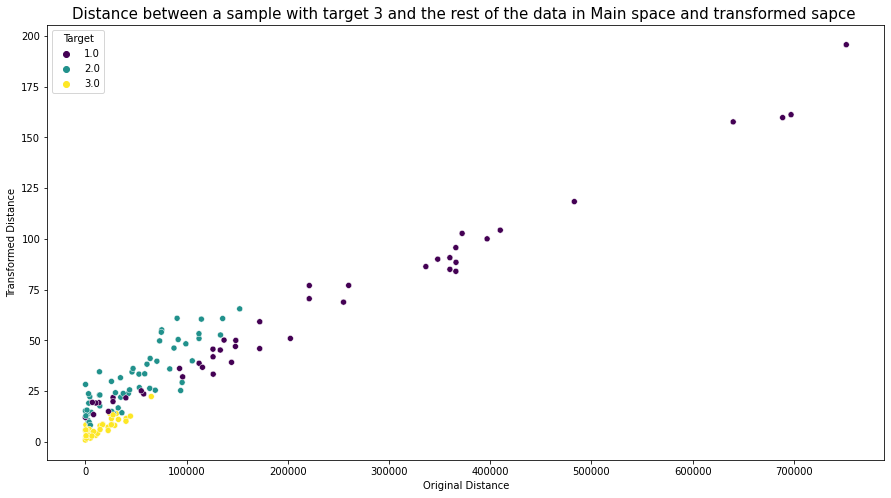

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_new,x='Original Distance',y='Transformed Distance',hue='Target',palette='viridis')
plt.title("Distance between a sample with target 3 and the rest of the data in Main space and transformed sapce ",size=15)

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

The test accuracy is : 100.0


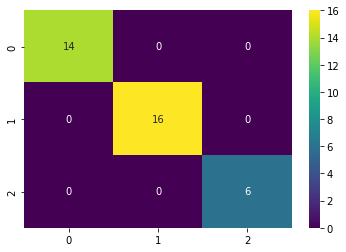

In [32]:
pred=[]
prob=[]
for row in X_test_new:
     neighbors = get_neighbors(X_tr_new, y_train.values, row, 5, distance=distance)   
     pred.append(vote_prob(neighbors)[0])
     prob.append(vote_prob(neighbors)[1])
acc=np.sum(np.array(pred)==y_test.values)/len(X_test)*100
print(sns.heatmap(confusion_matrix(y_test.values.astype('int'),np.array(pred).astype('int')),annot=True,cmap='viridis'))
print(classification_report(y_test.values.astype('int'),np.array(pred).astype('int')))
print("The test accuracy is : {}".format(acc))

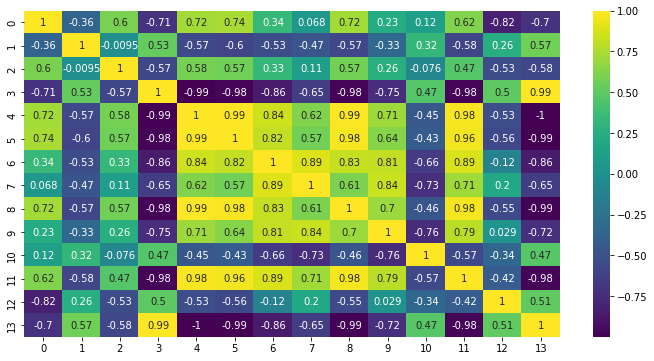

In [70]:
plt.figure(figsize=(12,6))
sns.heatmap(pd.DataFrame(np.hstack((y_test.values.reshape(len(X_test_new),1),X_test_new))).corr(),annot=True,cmap='viridis')

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [79]:
knn_model.fit(X_tr_new,y_train)

KNeighborsClassifier()

In [80]:
y_pred_new = knn_model.predict(X_test_new)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [82]:
accuracy_score(y_test,y_pred_new)

1.0

In [84]:
confusion_matrix(y_test,y_pred_new)

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

In [85]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#Elbow Method for Choosing Reasonable K Values

In [102]:
test_error_rates = []

for i in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    lmnn = LMNN(k=i, learn_rate=1e-6)
    X_tr_new=lmnn.fit_transform(X_train,y_train)
    X_test_new=lmnn.transform(X_test)
#X_test_metric,X_test_metric=lmnn.transform(X_test,y_test)
    knn_model.fit(X_tr_new,y_train) 
   
    y_pred_test = knn_model.predict(X_test_new)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

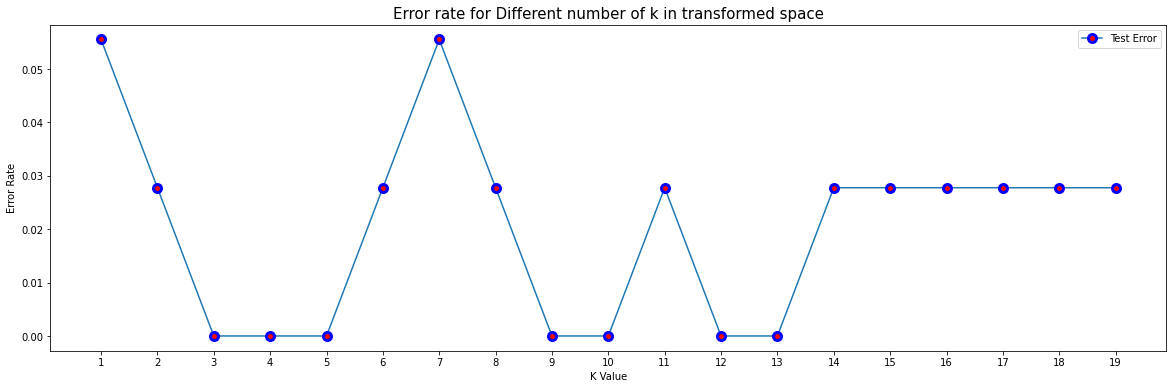

In [109]:
plt.figure(figsize=(20,6))
plt.plot(range(1,20),test_error_rates,label='Test Error',marker='o',markeredgecolor="b",markerfacecolor="r",ms=8,markeredgewidth=3)
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(np.arange(1,20));
plt.title('Error rate for Different number of k in transformed space',size=15);

# Creating a Pipeline to find K value

In [ ]:
knn = KNeighborsClassifier()
scaler = lmnn 


In [33]:
from metric_learn import LFDA

In [34]:
lfda = LFDA(k=5)

In [35]:
X_tr_new1=lfda.fit_transform(X_train,y_train)
X_test_new1=lfda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  RuntimeWarning)


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

The test accuracy is : 100.0


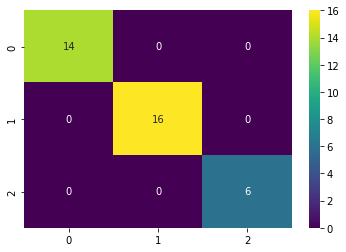

In [36]:
pred=[]
prob=[]
for row in X_test_new1:
     neighbors = get_neighbors(X_tr_new1, y_train.values, row, 5, distance=distance)   
     pred.append(vote_prob(neighbors)[0])
     prob.append(vote_prob(neighbors)[1])
acc=np.sum(np.array(pred)==y_test.values)/len(X_test)*100
print(sns.heatmap(confusion_matrix(y_test.values.astype('int'),np.array(pred).astype('int')),annot=True,cmap='viridis'))
print(classification_report(y_test.values.astype('int'),np.array(pred).astype('int')))
print("The test accuracy is : {}".format(acc))

In [37]:
(X_train.iloc[0]-X_train.iloc[1]).T @ lfda.get_mahalanobis_matrix() @ (X_train.iloc[0]-X_train.iloc[1])

6.261669350977045

In [38]:
(X_tr_new1[0]-X_tr_new1[1]).T @ (X_tr_new1[0]-X_tr_new1[1])

6.26166935097704

In [40]:
dis_new1=[]
for i in range(1,len(X_tr_new)):
  dis_new1.append((X_tr_new1[0]-X_tr_new1[i]).T @ (X_tr_new1[0]-X_tr_new1[i]))

In [41]:
df_new1=pd.DataFrame(np.vstack((np.array(dis),np.array(dis_new1),y_train.values[1:])).T,columns=['Original Distance','Transformed Distance','Target'])
df_new1

,Original Distance,Transformed Distance,Target
0,34968.3191,6.261669,2.0
1,112328.9394,8.522050,2.0
2,4937.0758,0.914025,3.0
3,27363.2192,25.508438,1.0
4,366082.3977,40.557296,1.0
...,...,...,...
136,70689.5479,8.401466,2.0
137,29754.1386,10.163255,2.0
138,112255.6614,11.570614,2.0
139,93093.5494,33.948526,1.0


Text(0.5, 1.0, 'Distance between a sample with target 3 and the rest of the data in Main space and transformed sapce ')

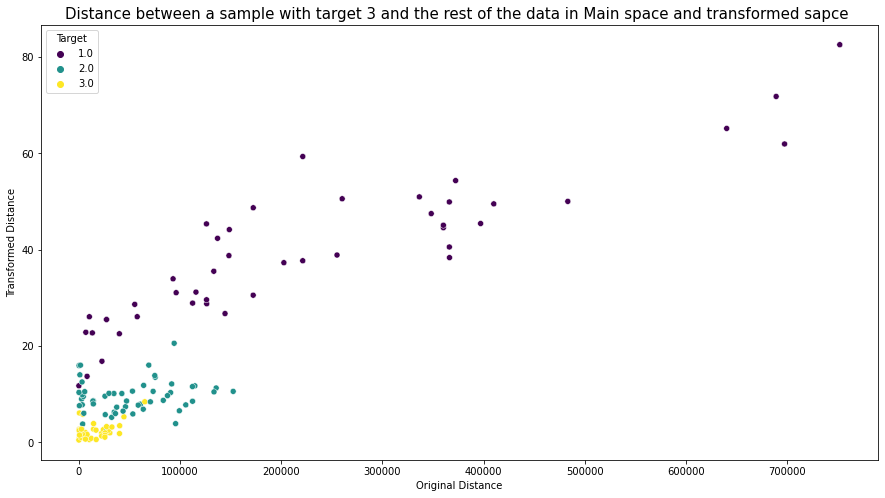

In [42]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_new1,x='Original Distance',y='Transformed Distance',hue='Target',palette='viridis')
plt.title("Distance between a sample with target 3 and the rest of the data in Main space and transformed sapce ",size=15)

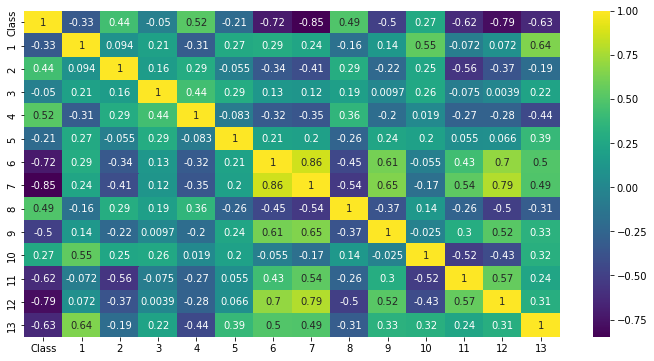

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

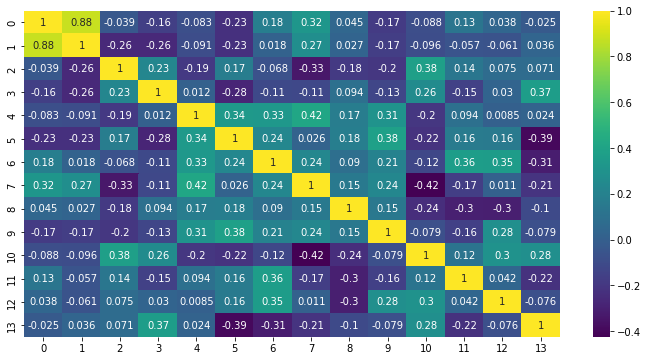

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(pd.DataFrame(np.hstack((y_test.values.reshape(len(X_test_new1),1),X_test_new1))).corr(),annot=True,cmap='viridis')

In [111]:
test_error_rates = []

for i in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    lfda = LFDA(k=i)
    X_tr_new1=lmnn.fit_transform(X_train,y_train)
    X_test_new1=lmnn.transform(X_test)
#X_test_metric,X_test_metric=lmnn.transform(X_test,y_test)
    knn_model.fit(X_tr_new1,y_train) 
   
    y_pred_test = knn_model.predict(X_test_new1)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

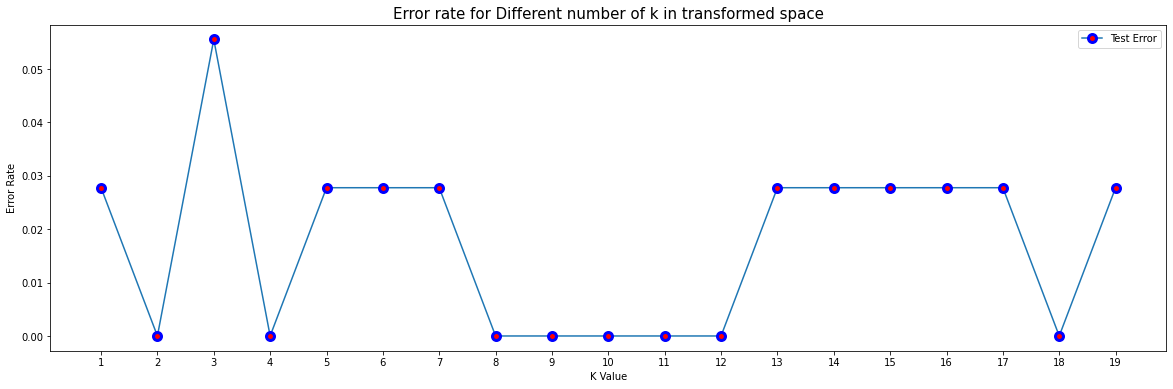

In [112]:
plt.figure(figsize=(20,6))
plt.plot(range(1,20),test_error_rates,label='Test Error',marker='o',markeredgecolor="b",markerfacecolor="r",ms=8,markeredgewidth=3)
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.xticks(np.arange(1,20));
plt.title('Error rate for Different number of k in transformed space',size=15);